In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Data

In [48]:
#Ligue 1
#saving each season as a data frame
#Data frames from Football-Data
df1_fbd = pd.read_csv("ligue0910.csv")
df2_fbd = pd.read_csv("ligue1011.csv")
df3_fbd = pd.read_csv("ligue1112.csv")
df4_fbd = pd.read_csv("ligue1213.csv")
df5_fbd = pd.read_csv("ligue1314.csv")
df6_fbd = pd.read_csv("ligue1415.csv")
df7_fbd = pd.read_csv("ligue1516.csv")
df8_fbd = pd.read_csv("ligue1617.csv")
df9_fbd = pd.read_csv("ligue1718.csv")
df10_fbd = pd.read_csv("ligue1819.csv")
df11_fbd = pd.read_csv("ligue1920.csv")
df12_fbd = pd.read_csv("ligue2021.csv")

#Renaming teams so fbd and fbref match
team_mapping = {
    'Paris S-G':'Paris SG',
    'Saint-Étienne':'St Etienne',
    'Arles-Avignon':'Arles',
    'Evian':'Evian Thonon Gaillard',
    'Gazélec Ajaccio': 'Ajaccio GFCO',
    'Nîmes': 'Nimes',
}

#2009/10 Season
df1_fbd = df1_fbd.iloc[:, :22] #removing betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/13/2009-2010/2009-2010-Ligue-1-Stats')[0]
df1_fbref = df1_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df1_fbref['Squad'] = df1_fbref['Squad'].replace(team_mapping) #renaming
df1 = df1_fbd.merge(df1_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing squad column
df1 = df1.drop('Squad', axis=1)

#2010/11 Season
df2_fbd = df2_fbd.iloc[:, :22] #removing betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/13/2010-2011/2010-2011-Ligue-1-Stats')[0]
df2_fbref = df2_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df2_fbref['Squad'] = df2_fbref['Squad'].replace(team_mapping) #renaming
df2 = df2_fbd.merge(df2_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing squad column
df2 = df2.drop('Squad', axis=1)


#2011/12 Season
df3_fbd = df3_fbd.iloc[:, :22] #removing betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/13/2011-2012/2011-2012-Ligue-1-Stats')[0]
df3_fbref = df3_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df3_fbref['Squad'] = df3_fbref['Squad'].replace(team_mapping) #renaming
df3 = df3_fbd.merge(df3_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing squad column
df3 = df3.drop('Squad', axis=1)

#2012/13 Season
df4_fbd = df4_fbd.iloc[:, :22] #removing betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/13/2012-2013/2012-2013-Ligue-1-Stats')[0]
df4_fbref = df4_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df4_fbref['Squad'] = df4_fbref['Squad'].replace(team_mapping) #renaming
df4 = df4_fbd.merge(df4_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing squad column
df4 = df4.drop('Squad', axis=1)

#2013/14 Season
df5_fbd = df5_fbd.iloc[:, :22] #removing betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/13/2013-2014/2013-2014-Ligue-1-Stats')[0]
df5_fbref = df5_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df5_fbref['Squad'] = df5_fbref['Squad'].replace(team_mapping) #renaming
df5 = df5_fbd.merge(df5_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing squad column
df5 = df5.drop('Squad', axis=1)

#2014/15 Season
df6_fbd = df6_fbd.iloc[:, :22] #removing betting data
df6_fbref = pd.read_html('https://fbref.com/en/comps/13/2014-2015/schedule/2014-2015-Ligue-1-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6,7]] #Selecting the home, away and attendance columns  
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping) #Replacing home teams
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping) #Replacing away teams
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2015/16 Season
df7_fbd = df7_fbd.iloc[:, :22] #removing betting data
df7_fbref = pd.read_html('https://fbref.com/en/comps/13/2015-2016/schedule/2015-2016-Ligue-1-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]] #Selecting the home, away and attendance columns  
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping)#Replacing home teams
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping)#Replacing away teams
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df7_fbd['Attendance'] = df7['Attendance']
df7 = df7.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2016/17 Season
df8_fbd = df8_fbd.iloc[:, :22] #removing betting data
df8_fbref = pd.read_html('https://fbref.com/en/comps/13/2016-2017/schedule/2016-2017-Ligue-1-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7, 8]] #Selecting the home, away and attendance columns     
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping)#Replacing home teams
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping)#Replacing away teams
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df8['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2017/18 Season
df9_fbd = df9_fbd.iloc[:, :22] #removing betting data
df9_fbref = pd.read_html('https://fbref.com/en/comps/13/2017-2018/schedule/2017-2018-Ligue-1-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9, 10]] #Selecting the home, away and attendance columns    
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping)#Replacing home teams
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping)#Replacing away teams
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2018/19 Season
df10_fbd = df10_fbd.iloc[:, :22] #removing betting data
df10_fbref = pd.read_html('https://fbref.com/en/comps/13/2018-2019/schedule/2018-2019-Ligue-1-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5,9, 10]] #Selecting the home, away and attendance columns     
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping)#Replacing home teams
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping)#Replacing away teams
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2019/20 Season
df11_fbd = df11_fbd.iloc[:, :23] #removing betting data
df11_fbref = pd.read_html('https://fbref.com/en/comps/13/2019-2020/schedule/2019-2020-Ligue-1-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns     
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping)#Replacing home teams
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping)#Replacing away teams
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1) #Drop home and away 

#2020/21 Season
df12_fbd = df12_fbd.iloc[:, :23] #removing betting data
df12_fbref = pd.read_html('https://fbref.com/en/comps/13/2020-2021/schedule/2020-2021-Ligue-1-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9, 10]]  #Selecting the home, away and attendance columns   
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping)#Replacing home teams
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping)#Replacing away teams
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1) #Drop home and away 

#Adding all data frames together
ligue_1 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).dropna(how='all').reset_index(drop=True) #remove empty rows


# Save the combined data frame to a new CSV file
ligue_1.to_csv('ligue_1.csv', index=False)

# Adding Season Column

In [49]:
#define nummber of games for each season
games_per_season = [380] * 10 + [279, 380]  # 10 seasons with 380 games, second-to-last season with 279 games, last season with 380 games

# Create the Season column
ligue_1['Season'] = '' # initialise the season column
start_year = 2009 #set the initial starting year for the first season

# Iterate over each season
idx = 0
for season_games in games_per_season:
    #iterate over each game in the season
    for _ in range(season_games):
        ligue_1.loc[idx, 'Season'] = f"{start_year}/{start_year + 1}" #assign the season value for the current game 
        idx += 1 #move to the next row in the dataframe 
    start_year += 1 #move to the next season
# Move the season column to be the second column
ligue_1.insert(1, 'Season', ligue_1.pop('Season'))

# Data Cleaning

In [50]:
ligue_1.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,F1,2009/2010,08/08/09,Auxerre,Sochaux,0.0,1.0,A,0.0,1.0,...,10.0,18.0,6.0,10.0,0.0,2.0,0.0,0.0,12438.0,NaN
1,F1,2009/2010,08/08/09,Grenoble,Marseille,0.0,2.0,A,0.0,1.0,...,14.0,19.0,3.0,6.0,2.0,1.0,0.0,0.0,13910.0,NaN
2,F1,2009/2010,08/08/09,Le Mans,Lyon,2.0,2.0,D,1.0,1.0,...,18.0,18.0,3.0,11.0,3.0,2.0,0.0,0.0,9214.0,NaN
3,F1,2009/2010,08/08/09,Monaco,Toulouse,1.0,0.0,H,1.0,0.0,...,17.0,19.0,8.0,4.0,2.0,3.0,1.0,0.0,7894.0,NaN
4,F1,2009/2010,08/08/09,Montpellier,Paris SG,1.0,1.0,D,0.0,0.0,...,15.0,18.0,4.0,2.0,1.0,3.0,1.0,0.0,17985.0,NaN
5,F1,2009/2010,08/08/09,Rennes,Boulogne,3.0,0.0,H,2.0,0.0,...,12.0,7.0,12.0,4.0,1.0,0.0,0.0,0.0,22660.0,NaN
6,F1,2009/2010,08/08/09,St Etienne,Nice,0.0,2.0,A,0.0,1.0,...,15.0,19.0,8.0,1.0,1.0,2.0,0.0,0.0,26331.0,NaN
7,F1,2009/2010,08/08/09,Valenciennes,Nancy,1.0,3.0,A,1.0,1.0,...,22.0,16.0,10.0,2.0,3.0,3.0,1.0,0.0,12123.0,NaN
8,F1,2009/2010,09/08/09,Bordeaux,Lens,4.0,1.0,H,1.0,1.0,...,14.0,20.0,4.0,3.0,0.0,1.0,0.0,0.0,29267.0,NaN
9,F1,2009/2010,09/08/09,Lille,Lorient,1.0,2.0,A,0.0,1.0,...,20.0,17.0,15.0,2.0,2.0,5.0,0.0,0.0,14940.0,NaN


In [51]:
ligue_1.shape
#shape is different due to 2019/20 season ending early

(4459, 25)

In [52]:
#Checking for missing values
print(ligue_1.isnull().sum())

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             1
HTAG             1
HTR              1
HS               1
AS               1
HST              1
AST              1
HF               3
AF               3
HC               1
AC               1
HY               1
AY               1
HR               1
AR               1
Attendance     386
Time          3800
dtype: int64


In [53]:
#finding the row with the missing values 
#match was invaded by bastia fans twice, so the game was abandoned and lyon awarded the win 
#match statistics are filled in with zero 
ligue_1.iloc[ligue_1[ligue_1['HS'].isnull()].index]

# replace values with zero for the specified row
ligue_1.loc[2985, ['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Attendance']] = 0
ligue_1.loc[2985, ['HTR']] = 'D'
ligue_1.iloc[2985]

Div                  F1
Season        2016/2017
Date           16/04/17
HomeTeam         Bastia
AwayTeam           Lyon
FTHG                0.0
FTAG                3.0
FTR                   A
HTHG                0.0
HTAG                0.0
HTR                   D
HS                  0.0
AS                  0.0
HST                 0.0
AST                 0.0
HF                  0.0
AF                  0.0
HC                  0.0
AC                  0.0
HY                  0.0
AY                  0.0
HR                  0.0
AR                  0.0
Attendance          0.0
Time                NaN
Name: 2985, dtype: object

In [54]:
#Identify rows with missing home fouls
missing_home_fouls_rows = ligue_1.iloc[ligue_1[ligue_1['HF'].isnull()].index]

#Iterate over the missing rows and fill in the missing fouls values
for index, row in missing_home_fouls_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average fouls for the HomeTeam in the current season
    average_home_fouls = ligue_1[(ligue_1['HomeTeam'] == home_team) & (ligue_1['Season'] == season)]['HF'].mean()

    # Fill in the missing fouls value with the calculated average
    ligue_1.at[index, 'HF'] = round(average_home_fouls, 0)

    
#Identify rows with missing away fouls
missing_away_fouls_rows = ligue_1.iloc[ligue_1[ligue_1['AF'].isnull()].index]

#Iterate over the missing rows and fill in the missing foul values
for index, row in missing_away_fouls_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['AwayTeam']
    season = row['Season']

    # Calculate the average fouls for the AwayTeam in the current season
    average_away_fouls = ligue_1[(ligue_1['AwayTeam'] == home_team) & (ligue_1['Season'] == season)]['AF'].mean()

    # Fill in the missing fouls value with the calculated average
    ligue_1.at[index, 'AF'] = round(average_away_fouls, 0)

In [55]:


#Identify rows with missing attendance values in the first 4089 rows
missing_attendance_rows = ligue_1.loc[:4078][pd.isnull(ligue_1.loc[:4078, 'Attendance'])]

#Iterate over the missing rows and fill in the missing attendance values
for index, row in missing_attendance_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average attendance for the HomeTeam in the current season
    average_attendance = ligue_1[(ligue_1['HomeTeam'] == home_team) & (ligue_1['Season'] == season)]['Attendance'].mean()

    # Fill in the missing attendance value with the calculated average
    ligue_1.at[index, 'Attendance'] = round(average_attendance, 0)

    
#replace all missing values with zero 
ligue_1['Attendance'].fillna(0, inplace=True) 

In [56]:
#Changing matches with incorrect attendance
ligue_1.at[2700, 'Attendance'] = 18977
ligue_1.at[4041, 'Attendance'] = 39177

In [57]:
#Remove time column
ligue_1 = ligue_1.drop('Time',axis=1)

In [58]:
#Checking if there are any missing values
ligue_1.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [59]:
#Data types
ligue_1.dtypes

Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG          float64
FTAG          float64
FTR            object
HTHG          float64
HTAG          float64
HTR            object
HS            float64
AS            float64
HST           float64
AST           float64
HF            float64
AF            float64
HC            float64
AC            float64
HY            float64
AY            float64
HR            float64
AR            float64
Attendance    float64
dtype: object

In [60]:
#Duplicated rowss
ligue_1.duplicated().sum()

0

In [61]:
#describe the data
ligue_1.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,4459.0,1.446961,1.226320,0.0,1.0,1.0,2.0,9.0
FTAG,4459.0,1.091949,1.096745,0.0,0.0,1.0,2.0,9.0
HTHG,4459.0,0.632429,0.770495,0.0,0.0,0.0,1.0,5.0
HTAG,4459.0,0.468042,0.689633,0.0,0.0,0.0,1.0,4.0
HS,4459.0,13.353891,4.795213,0.0,10.0,13.0,16.0,37.0
AS,4459.0,10.725948,4.220724,0.0,8.0,10.0,13.0,31.0
HST,4459.0,4.623907,2.399075,0.0,3.0,4.0,6.0,15.0
AST,4459.0,3.705539,2.166177,0.0,2.0,3.0,5.0,15.0
HF,4459.0,13.692308,4.122829,0.0,11.0,13.0,16.0,31.0
AF,4459.0,14.272707,4.314841,0.0,11.0,14.0,17.0,32.0


# Adding New Variables

In [62]:
# Home team average goals scored at home full time
ligue_1['HAGSFT'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
ligue_1['AAGSFT'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
ligue_1['HAGSHT'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting HTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
ligue_1['AAGSHT'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting HTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
ligue_1['HAGCFT'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
ligue_1['AAGCFT'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
ligue_1['HAR'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting HR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
ligue_1['AAR'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting AR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
ligue_1['HAY'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting HY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
ligue_1['AAY'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting AY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
ligue_1['HAF'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting HF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
ligue_1['AAF'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting AF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
ligue_1['HAC'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting HC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
ligue_1['AAC'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting AC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
ligue_1['HAS'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting HS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
ligue_1['AAS'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting AS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
ligue_1['HAST'] = (
    ligue_1.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting HST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
ligue_1['AAST'] = (
    ligue_1.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting AST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)







#Home team percentage of games won, lost and drawn at home
# Create new columns to store cumulative statistics for each HomeTeam's away games
ligue_1['home_games'] = 0
ligue_1['home_won'] = 0
ligue_1['home_lost'] = 0
ligue_1['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in ligue_1.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    ligue_1.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    ligue_1.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    ligue_1.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    ligue_1.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != ligue_1.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
ligue_1['home_won'] = ligue_1.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
ligue_1['home_drawn'] = ligue_1.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
ligue_1['home_lost'] = ligue_1.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
ligue_1['home_games'] = ligue_1.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
ligue_1['home_won'].fillna(0, inplace=True)
ligue_1['home_drawn'].fillna(0, inplace=True)
ligue_1['home_lost'].fillna(0, inplace=True)
ligue_1['home_games'].fillna(0, inplace=True)


#calculate the means for each row
ligue_1['HAWH'] = ligue_1['home_won'] / ligue_1['home_games']
ligue_1['HALH'] = ligue_1['home_lost'] / ligue_1['home_games']
ligue_1['HADH'] = ligue_1['home_drawn'] / ligue_1['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = ligue_1.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
ligue_1.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
ligue_1 =ligue_1.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
ligue_1['away_games'] = 0
ligue_1['away_won'] = 0
ligue_1['away_lost'] = 0
ligue_1['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in ligue_1.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    ligue_1.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    ligue_1.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    ligue_1.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    ligue_1.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != ligue_1.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
ligue_1['away_won'] = ligue_1.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
ligue_1['away_drawn'] = ligue_1.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
ligue_1['away_lost'] = ligue_1.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
ligue_1['away_games'] = ligue_1.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
ligue_1['away_won'].fillna(0, inplace=True)
ligue_1['away_drawn'].fillna(0, inplace=True)
ligue_1['away_lost'].fillna(0, inplace=True)
ligue_1['away_games'].fillna(0, inplace=True)

#calculate the means for each row
ligue_1['AAWA'] = ligue_1['away_won'] / ligue_1['away_games']
ligue_1['AALA'] = ligue_1['away_lost'] / ligue_1['away_games']
ligue_1['AADA'] = ligue_1['away_drawn'] / ligue_1['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = ligue_1.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
ligue_1.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
ligue_1 =ligue_1.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [63]:
#Adding a new column for if the match was pre or during covid
# Set 'pre_covid' to True for rows up to index 4078, and False for rows after that index
ligue_1['Pre_covid'] = ligue_1.index <= 4078

#Creating pre and during covid data frame
ligue_1_pre_covid = ligue_1[ligue_1['Pre_covid'] == True]
ligue_1_during_covid = ligue_1[ligue_1['Pre_covid'] == False]

In [64]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints
ligue_1['HomeTeamPoints'] = 0
ligue_1['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
ligue_1 = ligue_1.apply(update_points, axis=1)

# Create running tally of points for each team for each season
ligue_1['HomeTeamPoints'] = ligue_1.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
ligue_1['AwayTeamPoints'] = ligue_1.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a data frame to store total points for each team within each season
total_points_home = ligue_1.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = ligue_1.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the data frame to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
total_points['SeasonHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)


# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) to 4 decimal places
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonHA and OverallHA into the total_points data frame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the DataFrame by 'Season' and 'TotalPoints' columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonHA', 'OverallHA']]
total_points.columns = ['Season', 'Team', 'Home Points', 'Away Points', 'Total Points', 'SeasonalHA', 'OverallHA']

total_points



,Season,Team,Home Points,Away Points,Total Points,SeasonalHA,OverallHA
9,2009/2010,Marseille,45,33,78,0.5769,0.5686
8,2009/2010,Lyon,40,32,72,0.5556,0.5593
0,2009/2010,Auxerre,38,33,71,0.5352,0.5844
6,2009/2010,Lille,45,25,70,0.6429,0.5789
11,2009/2010,Montpellier,40,29,69,0.5797,0.5969
...,...,...,...,...,...,...,...
239,2020/2021,Strasbourg,17,25,42,0.4048,0.5629
222,2020/2021,Brest,28,13,41,0.6829,0.6597
232,2020/2021,Nantes,17,23,40,0.4250,0.5649
234,2020/2021,Nimes,14,21,35,0.4000,0.5739


In [65]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
ligue_1_pre_covid['HomeTeamPoints'] = 0
ligue_1_pre_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
ligue_1_pre_covid = ligue_1_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
ligue_1_pre_covid['HomeTeamPoints'] = ligue_1_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
ligue_1_pre_covid['AwayTeamPoints'] = ligue_1_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()



# Create initial columns for HomeTeamPoints and AwayTeamPoints for during covid
ligue_1_during_covid['HomeTeamPoints'] = 0
ligue_1_during_covid['AwayTeamPoints'] = 0


# Apply the update_points function to each row
ligue_1_during_covid = ligue_1_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
ligue_1_during_covid['HomeTeamPoints'] = ligue_1_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
ligue_1_during_covid['AwayTeamPoints'] = ligue_1_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Calculate total points for each team within each season

# Create a DataFrame to store total points for each team within each season
total_points_home_pre = ligue_1_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_home_during = ligue_1_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = ligue_1_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_away_during = ligue_1_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

#Aggregate the total points foe each team across the seasons 
total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()


#Rename columns for clarity 
total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid','HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})

#Merge the total points for home and away team and for pre covid and covid
points = pd.merge(total_points_home_pre, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['HomePointsPreCovid'] + points['AwayPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']), 4)
#Create a new data frame with only relevant columns and fill all NaN with 0
ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

,Team,HAPreCovid,HADuringCovid
0,Ajaccio,0.6321,0.0000
1,Ajaccio GFCO,0.5946,0.0000
2,Amiens,0.6509,0.0000
3,Angers,0.5766,0.4773
4,Arles,0.6000,0.0000
5,Auxerre,0.5844,0.0000
6,Bastia,0.6920,0.0000
7,Bordeaux,0.5959,0.5556
8,Boulogne,0.5484,0.0000
9,Brest,0.6533,0.6829


In [66]:
#Joining all tables 

# Merge the data frames based on Season and HomeTeam
merged_df = pd.merge(ligue_1, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'Team'])

# Select and adding the columns
columns_to_add = ['OverallHA', 'SeasonalHA']
ligue_1[columns_to_add] = merged_df[columns_to_add]

# Merge the result data frame based on team and HomeTeam
merged_df = pd.merge(ligue_1, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

#Selecting and adding the columns add to the main data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']
ligue_1[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
ligue_1 = ligue_1.rename(columns={'Pre_covid':'PreCovid'})

In [67]:
#Save the data frame with new columns to csv
ligue_1.to_csv('ligue_1.csv', index=False)

# Graphs

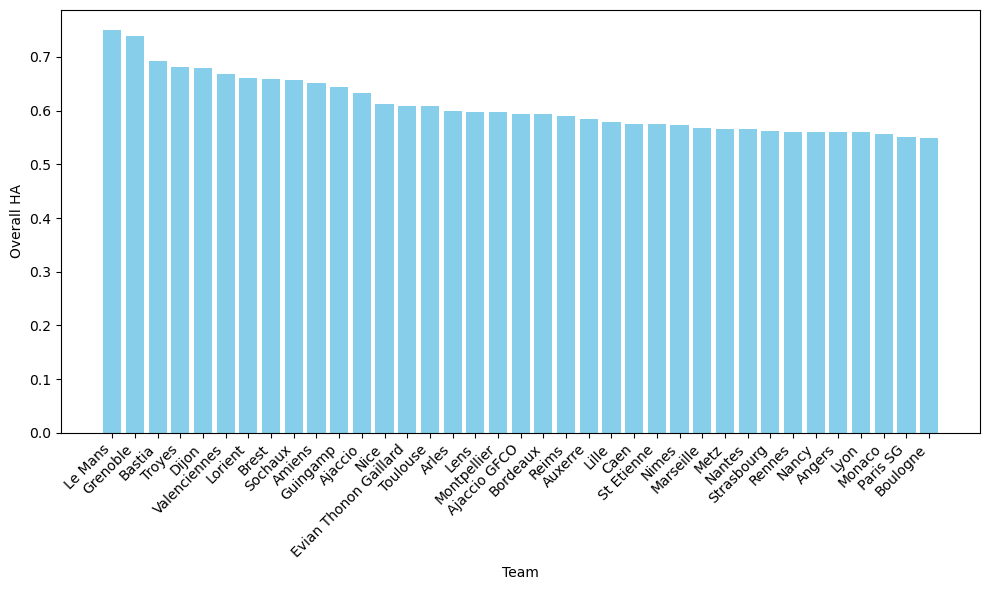

In [68]:
# Sort the DataFrame by OverallHA in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['Team'], total_points['OverallHA'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

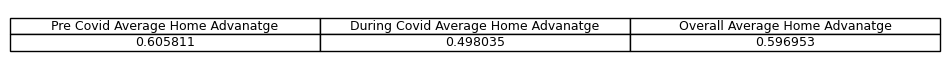

In [69]:
#Pre and during covid average home advantages 
#Calculate the HA for pre covid, during covid and overall, to 6 d.p.
ha_average_pre = round(ligue_1.loc[:4078,'HAPreCovid'].mean(),6)
ha_average_during = round(ligue_1.loc[4079:,'HADuringCovid'].mean(),6)
ha_average = round(ligue_1.loc[:, 'OverallHA'].mean(),6)

#Create a dictoriary to kepp the avergaes in 
ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}
#Create a data frame from the dictionary
ha_means = pd.DataFrame(ha_means)

#Create a figure and axis for displaying the data
fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)

#Display the table
ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
#Show the plot
plt.show()

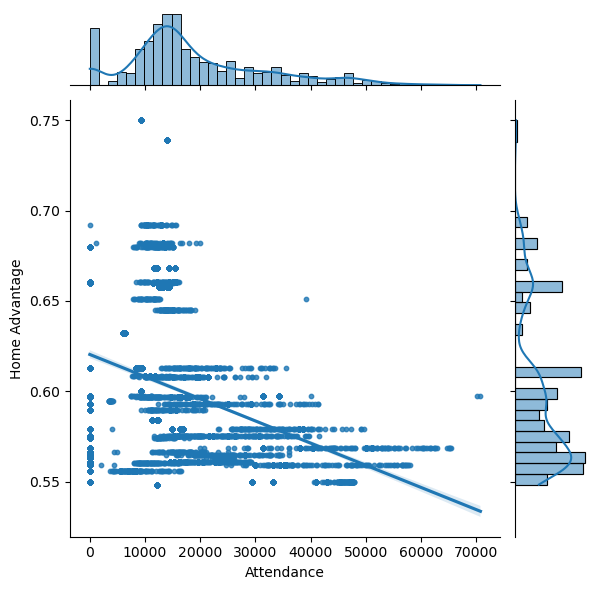

In [70]:
#A join plot using seaborn of attendacne and overallHA
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=ligue_1, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis

## Analysis for attendance and Pre Covid HA

In [71]:
#Creating two new data frames from the columns 'PreCovid'
ligue_1_pre_covid = ligue_1[ligue_1['PreCovid'] == True]
ligue_1_during_covid = ligue_1[ligue_1['PreCovid'] == False]


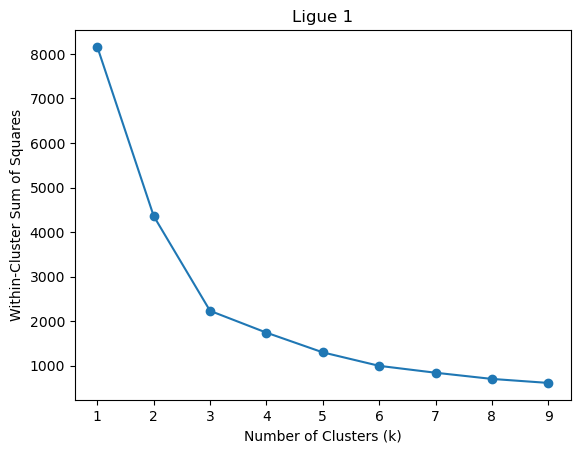

In [72]:
#Extracting the features
select_features = ligue_1_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Ligue 1')
plt.show()

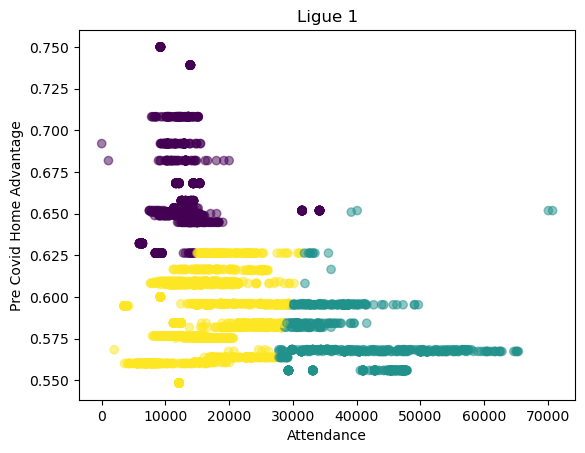

In [74]:
#choosing K
optimal_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
ligue_1_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#Plot the clusters
plt.scatter(ligue_1_pre_covid['Attendance'], ligue_1_pre_covid['HAPreCovid'], c=ligue_1_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('Ligue 1')
plt.show()


#cluster summary
cluster_summary = ligue_1_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = ligue_1_pre_covid['Cluster'].value_counts().sort_index()
# Round Attendance values to 0 decimal places
cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)



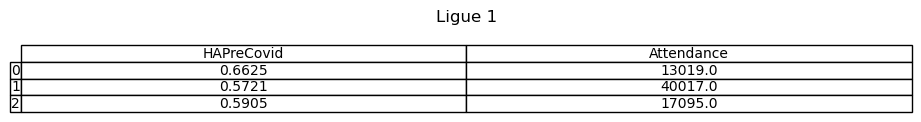

In [48]:
#Displaying the clusters
#Create a figure to show the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Ligue 1')
#turn axes off
ax.axis('off')
#Show table
plt.show()

## Match Statistics and Home Advanatge

### Pre Covid

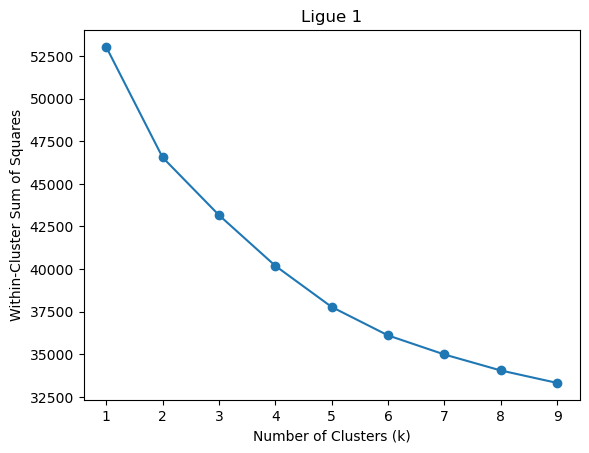

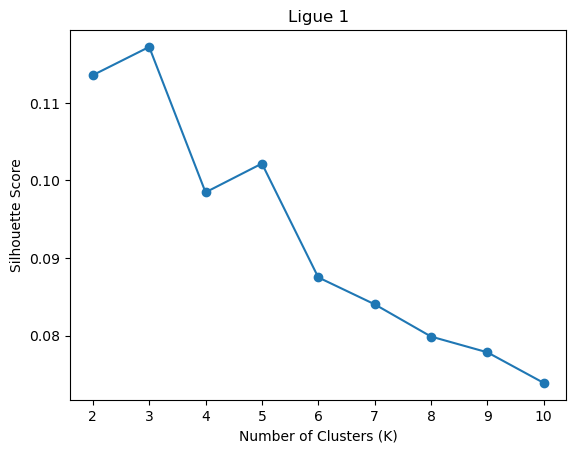

In [75]:
# Select features for clustering
select_features = ligue_1_pre_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Ligue 1')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Ligue 1')
plt.show()

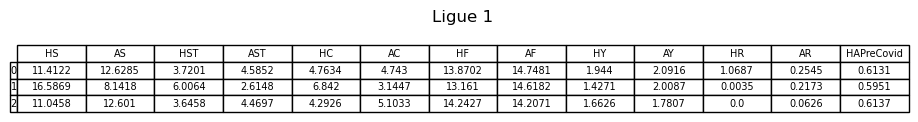

In [77]:
#Optimal value for k
optimal_k = 3
#Apply k-mean
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
ligue_1_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = ligue_1_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()


#Create a figure displaying the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)
#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)
#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Ligue 1')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()

### During Covid 

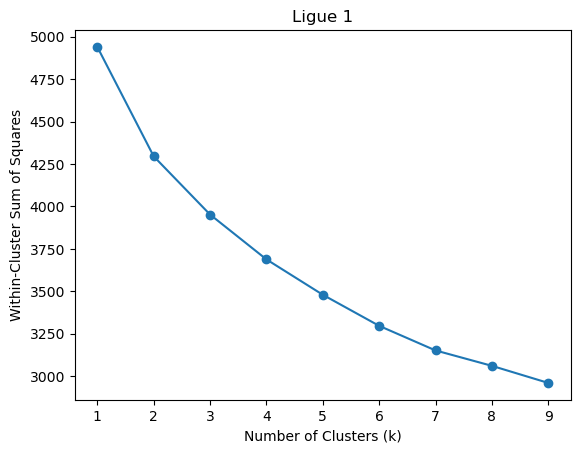

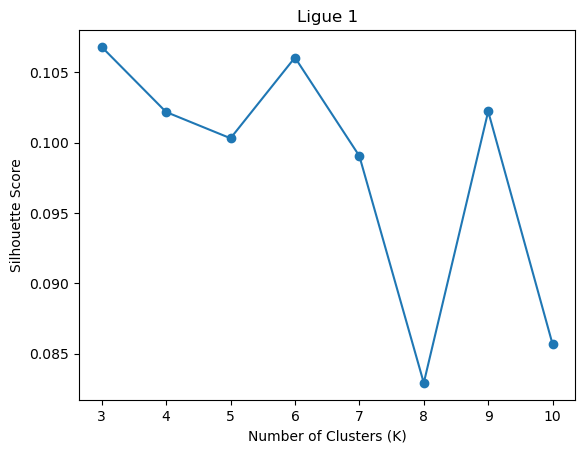

In [78]:
# Select features for clustering
select_features = ligue_1_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Ligue 1')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(3, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Ligue 1')
plt.show()

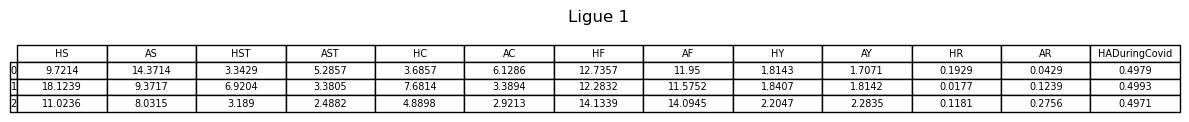

In [79]:
#Optimal value for k
optimal_k = 3 
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
ligue_1_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary =ligue_1_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()


#Create a figure displaying the table
fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)


#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Ligue 1')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()